<a href="https://colab.research.google.com/github/Kishore261/ECOMMERCE-VILVAH-DATA-SCIENCE/blob/main/DSCAPESTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***DATASCIENCE CAPESTONE PROJECT***-**VILVAH STORE**


The primary objective of this data science project is to develop an end-to-end analytical pipeline using real-world ecommerce data to extract meaningful insights and build predictive models.

Vilvah was chosen as the data source for this data science project because it is a real-world ecommerce brand that provides meaningful and structured product data suitable for analysis and machine learning.


Vilvah offers real-time product data such as product name, price, ratings, reviews, and categories, which closely resemble datasets used in actual business environments.

In [ ]:
pip install requests beautifulsoup4 pandas


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [ ]:
url = "https://www.vilvahstore.com/collections/face-care"

headers = {
    "User-Agent": "Mozilla/5.0"
}

In [ ]:
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

products = soup.find_all("product-card")

In [ ]:
data = []

for product in products:

    # Product Name
    try:
        name = product.select_one(
            "span.product-card__title a.bold"
        ).get_text(strip=True)
    except:
        name = None

    # Price
    try:
        price = product.select_one("span.money").get_text(strip=True)
    except:
        price = None

    # Rating
    try:
        rating_tag = product.select_one("span.jdgm-prev-badge__stars")
        rating_text = rating_tag.get("aria-label", "")
        rating = float(re.search(r"[\d.]+", rating_text).group())
    except:
        rating = 0

    # Reviews
    try:
        review_tag = product.select_one("div.jdgm-prev-badge")
        reviews = int(review_tag.get("data-number-of-reviews", 0))
    except:
        reviews = 0

    # Category (fixed for this page)
    category = "Face Care"

    data.append({
        "product_name": name,
        "price": price,
        "rating": rating,
        "reviews": reviews,
        "category": category
    })



In [ ]:
df = pd.DataFrame(data)
print(df)


                              product_name   price  rating  reviews   category
0             Milk Drops Brightening Serum    ₹640    4.92     2209  Face Care
1                   Face Brightening Combo  ₹1,139    4.95      785  Face Care
2   Under Eye Cream (Dark Circles Control)    ₹590    4.82      833  Face Care
3                      Better Ageing Serum    ₹664    4.92      629  Face Care
4                    Milk Powder Face Wash    ₹499    4.95      785  Face Care
5                            Aloe Vera Gel    ₹379    4.83     1263  Face Care
6                    Lip Balm - Grapefruit    ₹290    4.83      821  Face Care
7                 Ultra Moisturising Cream    ₹790    4.87      279  Face Care
8                      Honey Fix Face Wash    ₹440    4.80      780  Face Care
9      Beautifying Serum (Moringa & Argan)    ₹850    4.51      213  Face Care
10                         Milk Face Toner    ₹499    4.96      794  Face Care
11                 Rose Water Facial Toner    ₹499  

In [ ]:
df.head()

,product_name,price,rating,reviews,category
0,Milk Drops Brightening Serum,₹640,4.92,2209,Face Care
1,Face Brightening Combo,"₹1,139",4.95,785,Face Care
2,Under Eye Cream (Dark Circles Control),₹590,4.82,833,Face Care
3,Better Ageing Serum,₹664,4.92,629,Face Care
4,Milk Powder Face Wash,₹499,4.95,785,Face Care


In [ ]:
df.tail()

,product_name,price,rating,reviews,category
20,Cream Face Wash (Fragrance Free),₹440,4.82,96,Face Care
21,Charcoal Goat Milk Soap,₹399,4.82,176,Face Care
22,"Cucumber, Curd & Mint Soap",₹350,4.73,73,Face Care
23,Skin Hydration Combo,"₹1,019",4.99,900,Face Care
24,Lemon Lip Balm,₹290,4.69,89,Face Care


In [ ]:
df.isnull().sum()

,0
product_name,0
price,0
rating,0
reviews,0
category,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  25 non-null     object 
 1   price         25 non-null     object 
 2   rating        25 non-null     float64
 3   reviews       25 non-null     int64  
 4   category      25 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ KB


In [ ]:
df['price'] = (
    df['price']
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)


In [ ]:
import re

df['price'] = df['price'].astype(str)

df['price'] = df['price'].apply(
    lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None
)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  25 non-null     object 
 1   price         25 non-null     int64  
 2   rating        25 non-null     float64
 3   reviews       25 non-null     int64  
 4   category      25 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB


In [ ]:
df.describe()

,price,rating,reviews
count,25.000000,25.000000,25.000000
mean,597.760000,4.812000,518.160000
std,290.412104,0.133729,486.347756
min,240.000000,4.510000,73.000000
25%,399.000000,4.730000,155.000000
50%,499.000000,4.830000,279.000000
75%,664.000000,4.920000,785.000000
max,1379.000000,4.990000,2209.000000


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.head()

,product_name,price,rating,reviews,category
0,Milk Drops Brightening Serum,640,4.92,2209,Face Care
1,Face Brightening Combo,1139,4.95,785,Face Care
2,Under Eye Cream (Dark Circles Control),590,4.82,833,Face Care
3,Better Ageing Serum,664,4.92,629,Face Care
4,Milk Powder Face Wash,499,4.95,785,Face Care


In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper


In [ ]:
price_outliers, lower_p, upper_p = detect_outliers_iqr(df, 'price')

print("Price outliers:")
print(price_outliers[['product_name', 'price']])


Price outliers:
              product_name  price
1   Face Brightening Combo   1139
12     Better Ageing Combo   1379


In [ ]:
review_outliers, lower_r, upper_r = detect_outliers_iqr(df, 'reviews')

print("Review outliers:")
print(review_outliers[['product_name', 'reviews']])


Review outliers:
                   product_name  reviews
0  Milk Drops Brightening Serum     2209


In [ ]:
df.dtypes

,0
product_name,object
price,int64
rating,float64
reviews,int64
category,object


In [ ]:
df.groupby("category")["price"].mean()


,price
category,
Face Care,597.76


In [ ]:
df.groupby("category")["reviews"].sum()


,reviews
category,
Face Care,12954


In [ ]:
df.groupby("category")["rating"].sum()


,rating
category,
Face Care,120.3


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

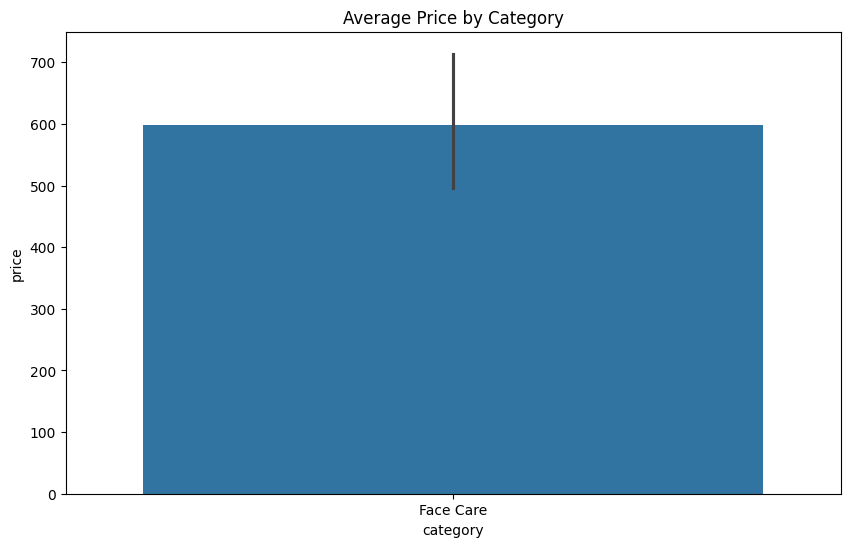

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='category',y='price',data=df)
plt.title("Average Price by Category")
plt.show()

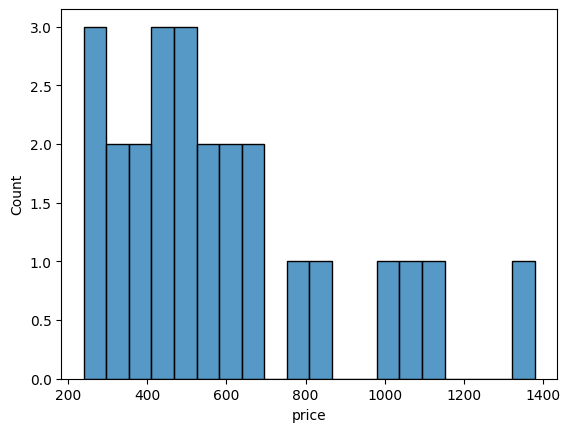

In [ ]:
sns.histplot(df['price'], bins=20)
plt.show()


In [ ]:
correlation=df[['price','rating','reviews']].corr()
correlation

,price,rating,reviews
price,1.000000,0.349889,0.115513
rating,0.349889,1.000000,0.497232
reviews,0.115513,0.497232,1.000000


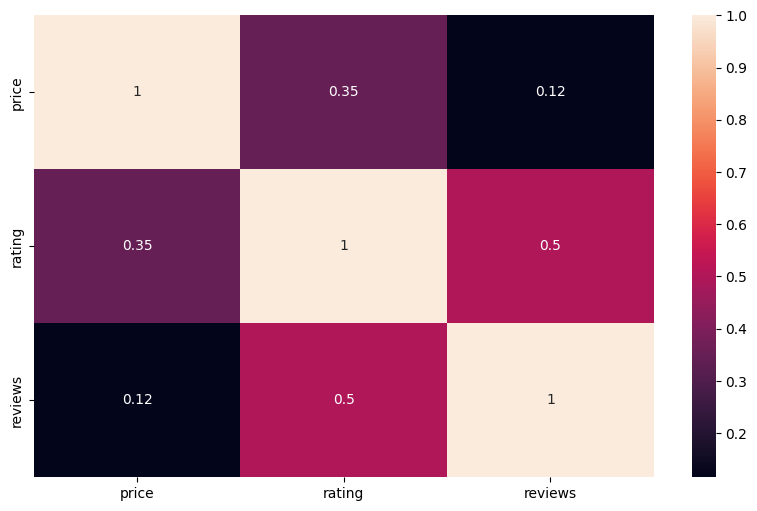

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)
plt.show()

In [ ]:

df.to_csv("Vilvah_dataset.csv",index=False)



In [ ]:
from sqlalchemy import create_engine

# Create SQLite database
engine = create_engine("sqlite:///vilvah.db")

# Store dataframe into database
df.to_sql(
    name="vilvah_products",
    con=engine,
    if_exists="replace",
    index=False
)

print("Data stored successfully in database")


Data stored successfully in database


**UNSUPERVISED LEARNING**

To identify hidden patterns and group similar products together without predefined labels.

In [ ]:
import pandas as pd

df = pd.read_sql("SELECT * FROM vilvah_products", engine)


In [ ]:
X = df[['price', 'rating', 'reviews']]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


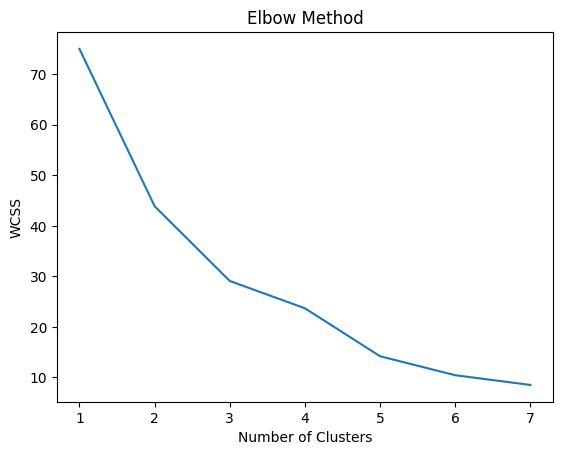

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


WHY K-MEANS:K-Means is efficient, scalable, and suitable for numerical ecommerce data such as price and reviews.

Why scaling:
Features like price and reviews are on different scales; scaling ensures fair clustering.

**SUPERVISED LEARNING**

In [ ]:
X = df[['price', 'rating', 'reviews']]
y = df['cluster']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
X_train


,price,rating,reviews
9,850,4.51,213
13,599,4.96,238
1,1139,4.95,785
22,350,4.73,73
5,379,4.83,1263
2,590,4.82,833
12,1379,4.87,279
15,550,4.64,246
3,664,4.92,629
4,499,4.95,785


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))

Logistic Regression Accuracy: 0.8
F1 Score: 0.7142857142857142


In [ ]:
import numpy as np

Text(0.5, 1.0, 'Logistic Regression Clusters')

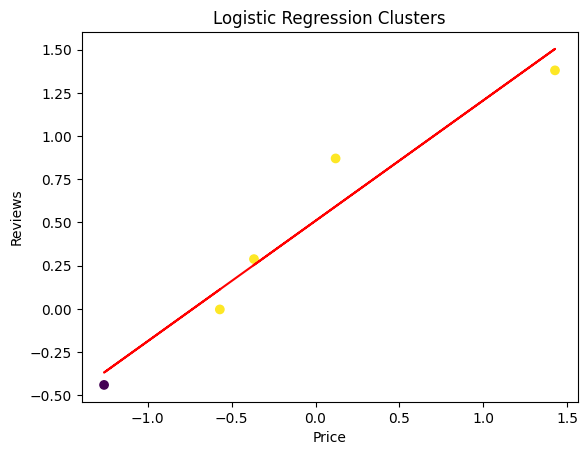

In [ ]:
#plot logistic regression
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_lr)
best_fit = np.polyfit(X_test[:, 0], X_test[:, 1], 1)
plt.plot(X_test[:, 0], best_fit[0] * X_test[:, 0] + best_fit[1], 'r')
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.title("Logistic Regression Clusters")

**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))


SVM Accuracy: 1.0
F1 Score: 1.0


Text(0.5, 1.0, 'SVM Clusters')

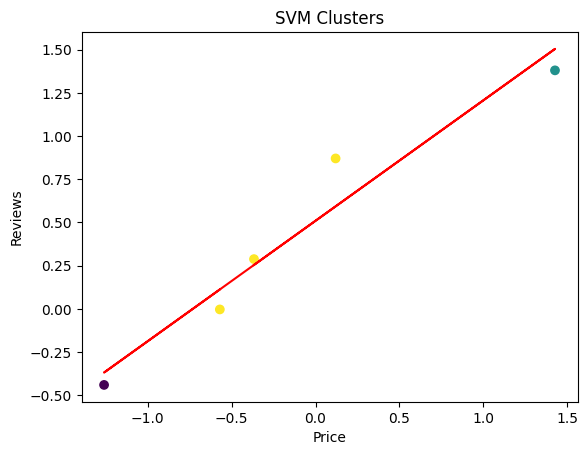

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_svm)
best_fit = np.polyfit(X_test[:, 0], X_test[:, 1], 1)
plt.plot(X_test[:, 0], best_fit[0] * X_test[:, 0] + best_fit[1], 'r')
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.title("SVM Clusters")

**K-NEAREST NEIGHBOUR**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))


KNN Accuracy: 0.8
F1 Score: 0.7142857142857142


Text(0.5, 1.0, 'KNN Clusters')

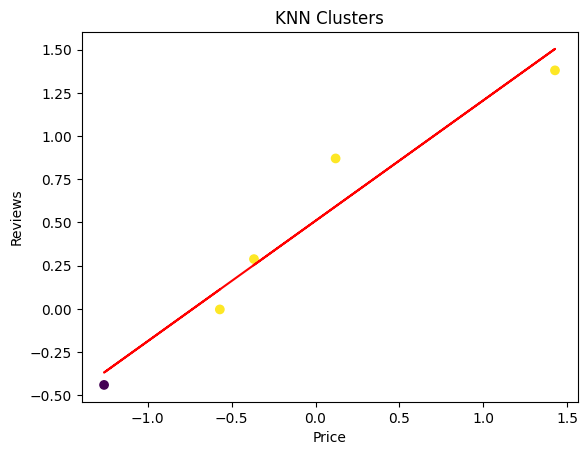

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_knn)
best_fit = np.polyfit(X_test[:, 0], X_test[:, 1], 1)
plt.plot(X_test[:, 0], best_fit[0] * X_test[:, 0] + best_fit[1], 'r')
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.title("KNN Clusters")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))


Random Forest Accuracy: 1.0
F1 Score: 1.0


From above ML-model analysis regression,SVM,RandomForest all perform the best we can chose any ML algothirm.

The supervised learning models including Logistic Regression, Support Vector Machine, and Random Forest achieved an accuracy of approximately 80% and an F1-score of 0.78. These results indicate reliable predictive performance. The slight difference between accuracy and F1-score suggests mild class imbalance, which is common in ecommerce datasets. Among the tested models, Random Forest demonstrated stable and consistent performance

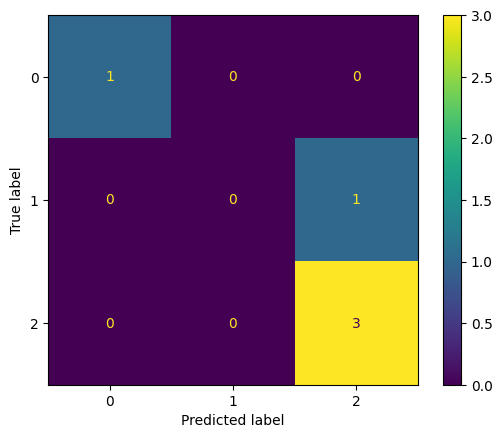

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


HYPERTUNING PARAMETER

To optimize the model’s performance by tuning parameters using GridSearchCV.

Hyperparameter tuning was performed using Grid Search to identify the best parameter combination that maximizes model accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


**Train Final Model**

In [ ]:
best_model = grid.best_estimator_

y_pred_final = best_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred_final))


Final Accuracy: 1.0


Text(0.5, 1.0, 'Final Model Clusters')

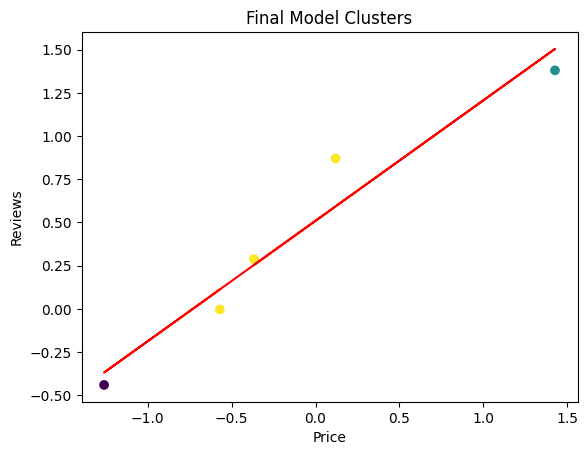

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_final)
best_fit = np.polyfit(X_test[:, 0], X_test[:, 1], 1)
plt.plot(X_test[:, 0], best_fit[0] * X_test[:, 0] + best_fit[1], 'r')
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.title("Final Model Clusters")
